Title: Exploring Trends in Cyber Attacks (2005-2020): A Comprehensive Analysis

Cyber attacks have become a prevalent threat in the modern digital landscape, impacting individuals, organizations and countries worldwide. This report aims to investigate the key trends in cyber attacks between 2005 and 2020 and how they have evolved over time. To investigate this topic, we will explore three sub-questions, each addressing a specific aspect of cyber attack trends.

(1) Frequency and Evolution: How has the frequency of cyber attacks changed between the year 2005 and 2020.

(2) Attack Types and Victims: What are the most common types of cyber attacks recorded in the dataset, and how have their proportions changed over time?

(3) Unidentified Attackers: What sectors or industries that are most frequently targeted by cyberattacks,and what are the changes over time.

This csv file contains the list of cyber incidents from 2005 to 2020, as reported by the Council of Foreign Relations.
The link to this dataset is: https://www.kaggle.com/datasets/fireballbyedimyrnmom/cyber-incidents-up-to-2020/

In [95]:
#import csv file

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cyber-operations-incidents.csv')

In [96]:
#Data cleaning 

df.head(5)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Attack on Austrian foreign ministry,2/13/2020,Turla,The suspected Russian hackers conducted a week...,Confirmation https://www.theregister.co.uk/2...,Austrian Foreign Ministry,Russian Federation,Espionage,Government,https://www.theregister.co.uk/2020/02/14/austr...,https://www.bmeia.gv.at/en/the-ministry/press/...,NaN
1,Spear-phishing campaign against unnamed U.S. g...,1/23/2020,Konni Group,The suspected North Korean threat actor Konni ...,NaN,Employees of the U.S. government,Korea (Democratic People's Republic of),Espionage,Government,https://unit42.paloaltonetworks.com/the-fractu...,NaN,NaN
2,Australian Signals Directorate,4/6/2020,NaN,Responsible for attacking infrastructure that ...,NaN,NaN,Australia,Data destruction,Private sector,https://www.minister.defence.gov.au/minister/l...,https://www.zdnet.com/article/australia-on-the...,NaN
3,Catfishing of Israeli soldiers,2/16/2020,APT-C-23,The Hamas-associated threat actor APT-C-23 tar...,Hack Back https://www.bleepingcomputer.com/n...,Israeli Defense Forces (IDF) soldiers,"Palestine, State of",Espionage,Military,https://www.bleepingcomputer.com/news/security...,https://research.checkpoint.com/2020/hamas-and...,NaN
4,Targeting of U.S. companies and government age...,8/10/2020,Fox Kitten,Iranian hackers attacked high-end networking e...,NaN,"U.S. government agencies, U.S. companies",Iran (Islamic Republic of),Espionage,"Government, Private sector",https://www.cybersafe.news/fbi-warns-about-ira...,https://www.zdnet.com/article/fbi-says-an-iran...,NaN


In [97]:
#Remove features that are not used in this Report

remove = ['Description', 'Sources_1', 'Sources_2', 'Sources_3', 'Response','Sponsor']
df.drop(remove, inplace=True, axis=1)

In [98]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print(f"Missing Values : \n {missing_values}")

Missing Values : 
 Title             0
Date              7
Affiliations    134
Victims          28
Type             34
Category         23
dtype: int64


In [99]:
# Replace missing values in 'Affiliations' column with 'Unidentified'

df['Affiliations'].fillna('Unidentified', inplace=True)

In [100]:
# Delete rows where 'Date' column is missing

df.dropna(subset=['Date'], inplace=True)

# Delete rows where 'Category' column is missing

df.dropna(subset=['Category'], inplace=True)

In [101]:
# Delete rows where 'Type' column is missing

df.dropna(subset=['Type'], inplace=True)

In [102]:
# Check for duplicates in the 'Date' column

duplicates = df.duplicated(subset= ['Date'], keep='first')

print(sum(duplicates))

50


In [103]:
# Check for duplicates in the 'Title' column

duplicates = df.duplicated(subset= ['Title'], keep='first')

print(sum(duplicates))

1


In [104]:
# Remove duplicate with same 'Title' and 'Date'

df.drop_duplicates(subset= ['Title', 'Date'], keep='last')

shape_before = df.shape[0] + sum(duplicates)
shape_after = df.shape[0]

# Calculate the number of duplicates removed
duplicates_removed = shape_before - shape_after

# Print the number of duplicates removed and the updated DataFrame shape
print(f"Number of duplicates removed: {duplicates_removed}")
print(f"DataFrame shape before deduplication: {shape_before}")
print(f"DataFrame shape after deduplication: {shape_after}")

Number of duplicates removed: 1
DataFrame shape before deduplication: 434
DataFrame shape after deduplication: 433


In [105]:
# Change the column name ‘Title’ to ‘Name-Of-Attack’

df.rename(columns={'Title': 'Name-Of-Attack'}, inplace=True)

# Change the column name ‘Affiliations’ to ‘Attacker-Name’

df.rename(columns={'Affiliations': 'Attacker-Name'}, inplace=True)

# Change the column name ‘Victim’ to ‘Attack-Target’
df.rename(columns={'Victims': 'Attack-Target'}, inplace=True)

# Change the column name ‘Type’ to ‘Attack-Type’
df.rename(columns={'Type': 'Attack-Type'}, inplace=True)


# Change the column name ‘Category’ to ‘Sector-Impacted’
df.rename(columns={'Category': 'Sector-Impacted'}, inplace=True)


In [106]:
# Check the values of ‘Attack-Target’
print(f"Attack-Target values: \n {df['Attack-Target'].unique()}")

Attack-Target values: 
 ['Austrian Foreign Ministry' 'Employees of the U.S. government' nan
 'Israeli Defense Forces (IDF) soldiers'
 'U.S. government agencies, U.S. companies'
 'Saudi Arabian citizens in the Untied States'
 'Global financial institutions'
 'Iranian expats and dissidents, North American and Israeli organizations'
 'Burisma' 'Ben Hubbard' 'Israel'
 'Arabic speakers in Syria and surrounding region' 'Defense companies'
 'Private companies in numerous countries'
 'Poland’s War Studies University' 'Iranian expats and dissidents' 'Bapco'
 'Japanese, Russian, and South Korean civil society, private sector, and government entities.'
 'Infrastructure used by foreign-based cybercriminals'
 'Taiwanese government agencies and email accounts'
 'The U.S. electrical grid' 'European aerospace and defense firms'
 'U.S. government networks' 'Mitsubishi Electric employees'
 'Private Companies, Governments, Nongovernmental Organizations, Individual Dissidents, Clergy, Democratic and Human

In [107]:
# Check the values of ‘Attack-Type’
print(f"Attack-Type values: \n {df['Attack-Type'].unique()}")

Attack-Type values: 
 ['Espionage' 'Data destruction' 'Financial Theft' 'Sabotage' 'Defacement'
 'Denial of service' 'Doxing']


In [108]:
# Check the values of ‘Sector-Impacted’
print(f"Sector-Impacted values: \n {df['Sector-Impacted'].unique()}")


Sector-Impacted values: 
 ['Government' 'Private sector' 'Military' 'Government, Private sector'
 'Civil society, Private sector, Government' 'Civil society'
 'Government, Military' 'Private sector, Government, Civil society'
 'Private sector, Government' 'Private sector, Civil society'
 'Government, Civil society' 'Government, Private sector, Civil society'
 'Private sector, Government, Military, Civil society'
 'Private sector, Government, Civil society, Military'
 'Civil society, Government' 'Civil society, Private sector'
 'Military, Government, Civil society'
 'Government, Civil society, Private sector' 'Military, Civil society'
 'Military, Government' 'Military, Private sector'
 'Private sector, Military']


In [109]:
# Mapping for changing for merging inconsistent values in 'Sector_Impacted' column

Sector_Impacted_mapping = { 
    'Private sector, Government, Civil society, Military':'Private sector, Government, Military, Civil society'
}

# Replace the merged values in 'Sector_Impacted' column
df['Sector-Impacted'].replace(Sector_Impacted_mapping, inplace=True)

In [110]:
#Check the data type of the column ‘Date’

print(f"Data type of Date column: {df['Date'].dtype}")

Data type of Date column: object


In [111]:
# Convert the 'Date' column to datetime

df['Date'] = pd.to_datetime(df['Date'])

# Check new data type of the column ‘Date’

print(f"New data type of Date column: {df['Date'].dtype}")

New data type of Date column: datetime64[ns]


How has the frequency of cyber attacks changed between the year 2005 and 2020?

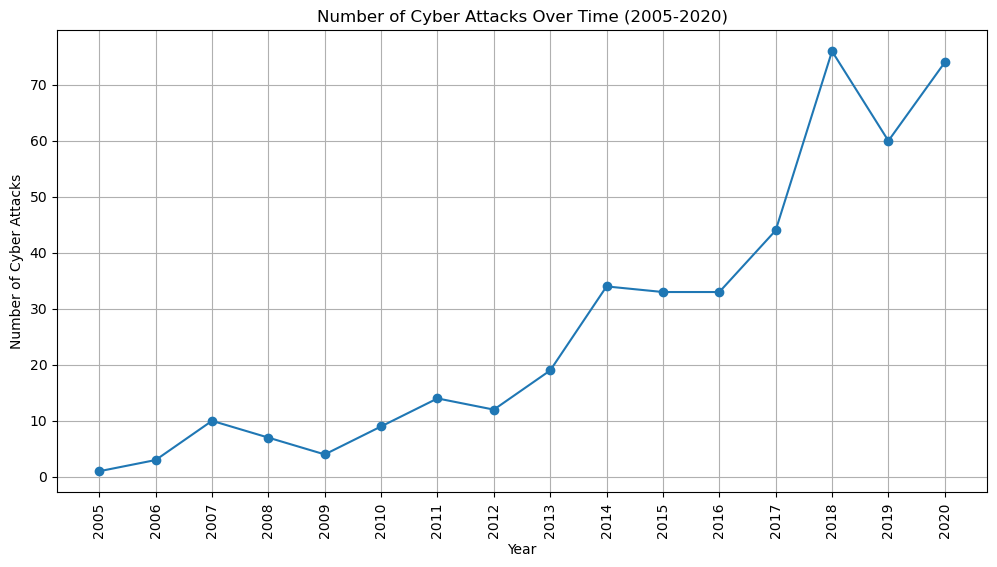

In [112]:
#Plot a line chart that shows the yearly frequency of cyber attacks over the specified period (2005-2020).

#Create a copy of the dataframe
sub1_df = df.copy()
sub1_df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12, 6))
sub1_df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Cyber Attacks')
plt.title('Number of Cyber Attacks Over Time (2005-2020)')
plt.xticks(range(2005, 2021, 1), rotation=90) 
plt.grid(True)
plt.show()

The graph above shows the yearly frequency of cyber attacks betwwen the years 2005 and 2020.The number of cyber Attacks increased sharply over the period. In 2005, there was only one recorded cyber attack, but this number steadily increased each year, reaching a peak of 76 attacks in 2018.

The most significant trend in the graph is the consistent growth in cyber attacks. The number of attacks has been on a steady rise, with a few fluctuations along the way. This upward trend suggests a growing threat of cyber attacks in recent years.

In conclusion, the graph illustrates a consistent increase in cyber attacks from 2005 to 2020, with a notable surge in the number of attacks in the last few years of the period. This trend highlights the growing importance of cybersecurity in the modern digital landscape.

What are the most common types of cyber attacks recorded in the dataset, and how have their proportions changed over time?

<Figure size 1000x600 with 0 Axes>

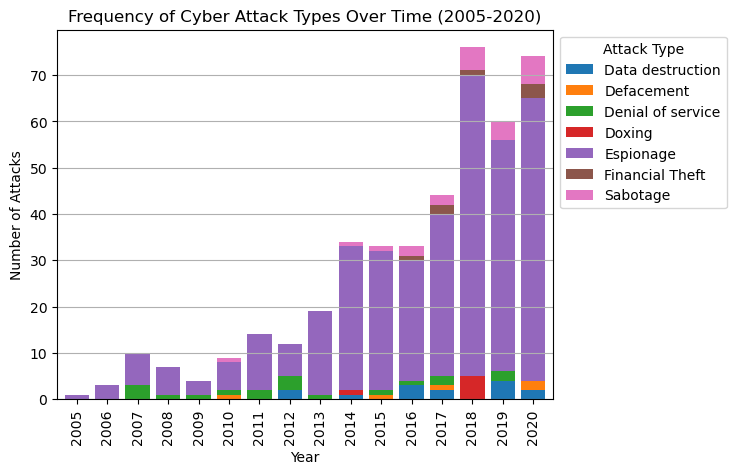

In [113]:
#Plot a stacked bar chart displays the changing proportions of different attack types over the years.

#Create a copy of the dataframe
sub2_df = df.copy()
sub2_df['Year'] = df['Date'].dt.year

pivot_df = sub2_df.pivot_table(values='Name-Of-Attack', index='Year', columns='Attack-Type', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, width=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Frequency of Cyber Attack Types Over Time (2005-2020)')
plt.legend(title='Attack Type',bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

The graph above shows the changing proportions of different attack types betwwen the years 2005 and 2020. The most significant trend is the steady increase in Espionage-related attacks, with a peak in 2018 and 2020, signaling a growing concern for data theft and covert operations. In contrast, Defacement attacks remain consistently low throughout this period, representing the smallest threat category.

Financial Theft and Sabotage attacks, which can have severe consequences for organizations, have shown a noticeable increase in the latter years, particularly from 2016 onwards. This indicates a shift in cybercriminal motivations towards financial gain and disruption.

Doxing attacks, involving the exposure of private information, show intermittent spikes in 2014 and 2015. Denial of Service (DoS) attacks exhibit moderate frequencies over the years, with slight variations but no dominant upward or downward trend.

In summary, the primary trends in this data show a rise in Espionage, Financial Theft, and Sabotage attacks, while Defacement attacks remain minimal. 

What percentage of attackers remain anonymous, and how has this percentage evolved over time?

In [114]:
#Plot a bar chart that displays the sectors that are most frequently targeted by cyberattacks each year

#Create a copy of the dataframe
sub3_df = df.copy()
sub3_df['Year'] = df['Date'].dt.year

# Group by 'Sector-Impacted' and 'Year', then count the number of attacks
sector_attacks = sub3_df.groupby(['Sector-Impacted', 'Year'])['Name-Of-Attack'].count().reset_index()

# Find the sector with the highest number of attacks for each year
sector_max_attacks = sector_attacks.groupby('Year')['Name-Of-Attack'].idxmax()
most_attacked_sectors = sector_attacks.loc[sector_max_attacks]

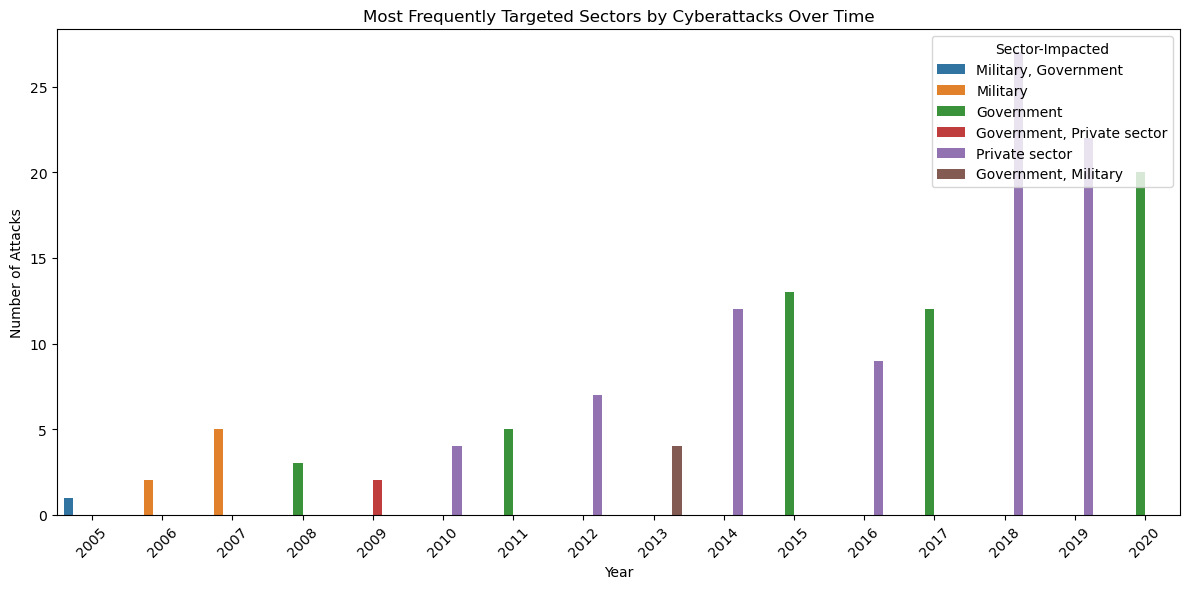

In [115]:
# Plot the data
plt.figure(figsize=(12, 6))  
sns.barplot(data=most_attacked_sectors, x='Year', y='Name-Of-Attack', hue='Sector-Impacted')
plt.title('Most Frequently Targeted Sectors by Cyberattacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)  
# Show the plot
plt.legend(title='Sector-Impacted', loc='upper right')
plt.tight_layout()
plt.show()


The graph above shows sectors that are most frequently targeted by cyberattacks for each year. In the early years the "Military" and "Government" sectors were primary targets, not util there was shift in 2008 with the Government" sector consistently experiencing a high volume of cyberattacks in the subsequent years. 

This trend is accompanied by instances of multiple sectors, such as "Government" and "Private sector," being targeted simultaneously.In the later years of the dataset (2018-2020), the "Private sector" emerges as the most attacked sector, revealing a growing interest in corporate and business entities among cyber attackers. 

In summary, the analysis of cyberattack trends from 2005 to 2020 highlights a dynamic cyber security challenge. Shifts in targeting, from military and government sectors to a focus on private enterprises, emphasize the need for adaptable and proactive cybersecurity strategies.

The project findings indicate a significant rise in cyber attacks between 2005 and 2020, with the number of incidents steadily increasing each year and peaking in 2018. The most prominent trends include the consistent growth in cyber attacks overall, a notable increase in espionage-related attacks, a minimal threat from defacement attacks, and a shift towards financial theft and sabotage as cybercriminal motivations. Additionally, the targeted sectors shifted from military and government to a focus on private enterprises, particularly in the later years of the dataset. This dynamic cyber threat landscape underscores the pressing need for adaptable and proactive cybersecurity strategies to counter evolving attack patterns, motivations, and target sectors.

To further explore this topic i would need to know specific factors that contribute to this trends. Factors such as whether victims of the civil socity attacks had any cyber awarness education prior to the atack, if technolagy enhancment contributed to the increase of a particular type of attack e.t.c